In [26]:
import pandas as pd
import numpy as np
import shap
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [27]:
from IPython.display import display
# Carica il dataset
data = pd.read_csv("C:\\Users\\testy\\Desktop\\autoscout_prices1.csv", sep=',')

# Conta il numero di righe
numero_righe = len(data)
print(numero_righe)

# Visualizza le prime righe
display(data.head())


15915


,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


Statistiche Descrittive:


,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


Frequenze per make_model:


make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

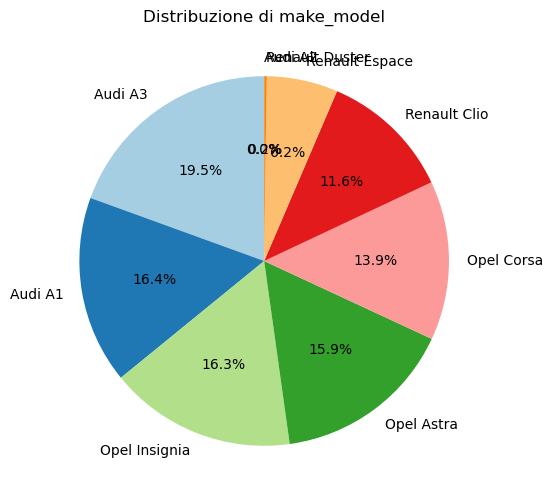

Frequenze per body_type:


body_type
Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: count, dtype: int64

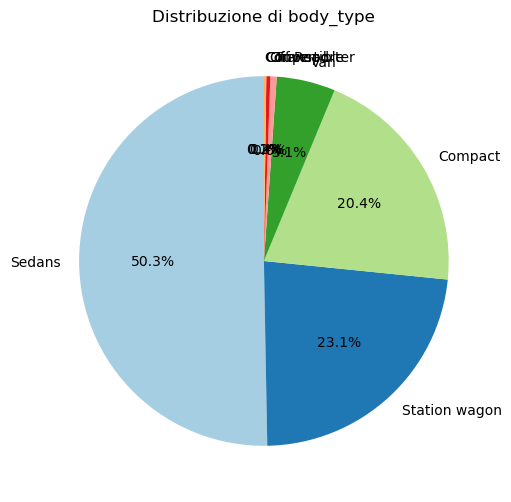

Frequenze per vat:


vat
VAT deductible      15044
Price negotiable      871
Name: count, dtype: int64

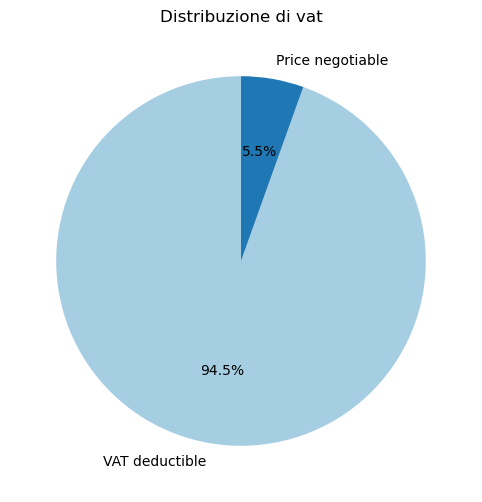

Frequenze per Type:


Type
Used              11095
New                1649
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: count, dtype: int64

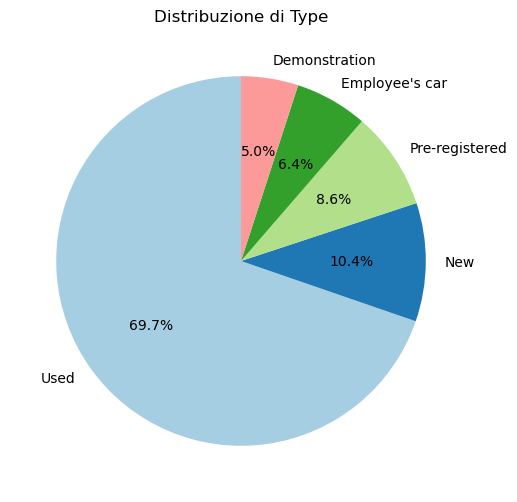

Frequenze per Fuel:


Fuel
Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: count, dtype: int64

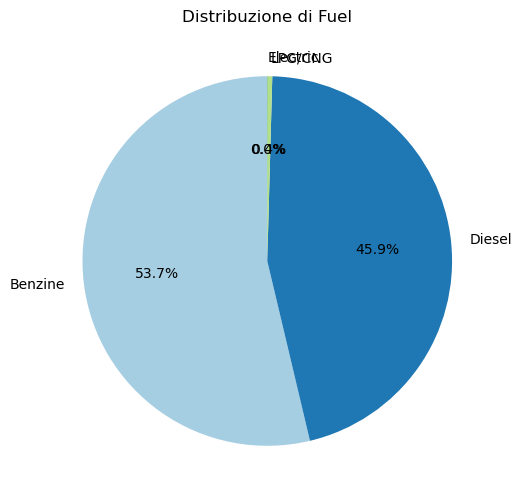

Frequenze per Gears:


Gears
6.0    8623
5.0    4257
7.0    2810
8.0     225
Name: count, dtype: int64

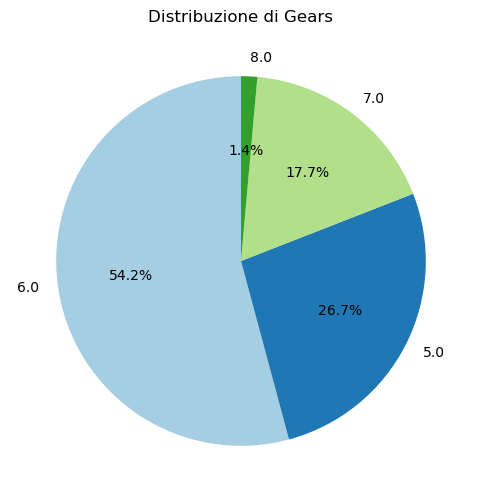

Frequenze per Comfort_Convenience:


Comfort_Convenience
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   388
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                                   187
Ai

In [ ]:
# Statistiche descrittive dei dati numerici
print("Statistiche Descrittive:")
display(data.describe())

# Funzione per visualizzare le frequenze e il grafico a torta
def display_frequencies(column_name):
    print(f"Frequenze per {column_name}:")
    counts = data[column_name].value_counts()
    display(counts)
    plt.figure(figsize=(10, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(counts))))
    plt.title(f"Distribuzione di {column_name}")
    plt.show()

# Funzione per visualizzare un istogramma per le colonne numeriche
def display_histogram(column_name):
    print(f"Istogramma per {column_name}:")
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name].dropna(), bins=30, color='skyblue', edgecolor='black')  # Adegua il numero di bins secondo necessità
    plt.title(f"Distribuzione di {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('Frequenza')
    plt.grid(True)
    plt.show()

# Visualizza le frequenze e i grafici a torta per le colonne categoriche selezionate
columns_categorical = ['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Gears', 'Comfort_Convenience',
                       'Entertainment_Media', 'Previous_Owners', 'Inspection_new', 'Paint_Type', 'Upholstery_type', 
                       'Gearing_Type', 'Drive_chain']
for column in columns_categorical:
    display_frequencies(column)

# Visualizza gli istogrammi per le colonne numeriche selezionate
columns_numeric = ['price', 'km', 'hp_kW', 'Displacement_cc', 'Weight_kg', 'cons_comb']
for column in columns_numeric:
    display_histogram(column)


In [ ]:
# Pre-processing: Rimuovi righe con valori mancanti
data = data.dropna()

# 2. Definisci le feature (X) e la variabile target (y)
X = data.drop(columns=['price'])  # Feature: tutte le colonne tranne 'price'
y = data['price']  # Target: la colonna 'price'

In [ ]:
# Mostra le statistiche prima della normalizzazione

# Definisci le colonne numeriche che vuoi normalizzare
numeric_cols = ['price', 'km', 'hp_kW', 'Displacement_cc', 'Weight_kg', 'cons_comb']

print("Prima della normalizzazione:")
display(data[numeric_cols].describe())

# Applica la normalizzazione
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Mostra le statistiche dopo la normalizzazione
print("Dopo la normalizzazione:")
display(data[numeric_cols].describe())

In [ ]:
# 1. Applica One-Hot Encoding su tutto il dataset
X_encoded = pd.get_dummies(X, drop_first=True)


In [ ]:
# 2. Divisione dei dati in training e test set
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Verifica dimensioni e consistenza
print("Dimensioni di X_train_encoded:", X_train_encoded.shape)
print("Dimensioni di X_test_encoded:", X_test_encoded.shape)

In [ ]:
import xgboost as xgb

# 4. Inizializza il modello XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# 5. Addestra il modello
model.fit(X_train_encoded, y_train)

# 6. Valutazione del modello sul test set
y_pred = model.predict(X_test_encoded)

# 7. Stampa delle metriche di valutazione
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt

# Grafico Valori Reali vs Predetti
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonale ideale
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Valori Reali vs Valori Predetti")
plt.grid(True)
plt.show()


In [ ]:

# Importanza delle feature
importanza = model.feature_importances_
feature_names = X_train_encoded.columns  # Nomi delle feature

# Crea un DataFrame per visualizzare l'importanza
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importanza
})

# Ordina per importanza
importance_df = importance_df.sort_values(by='Importance', ascending=False)
display(importance_df)

In [ ]:
# Adapt data for**SHAP Analysis**

print(X_train_encoded.dtypes)
bool_columns = X_train_encoded.select_dtypes(include=['bool']).columns
X_train_encoded[bool_columns] = X_train_encoded[bool_columns].astype(int)
X_test_encoded[bool_columns] = X_test_encoded[bool_columns].astype(int)
print("dati aggiornati\n")
print(X_train_encoded.dtypes)

In [ ]:
explainer = shap.Explainer(model, X_train_encoded)  # Crea l'explainer SHAP
shap_values = explainer(X_test_encoded) # Calcola i valori SHAP

plt.figure(figsize=(12, 8))  # Aumenta le dimensioni a piacere
shap.summary_plot(shap_values, X_test_encoded)
shap.plots.bar(shap_values)  # Usa un bar plot per una visualizzazione più semplice
  # Salva il grafico come immagine

# **Visualizzazione 1: SHAP Summary Plot**
shap.summary_plot(shap_values, X_test_encoded)

# **Visualizzazione 2: SHAP Bar Plot (Importanza delle feature)**
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar")

In [ ]:
def generate_shap_explanation(shap_values, features, feature_names):
    explanation = "La previsione è stata influenzata principalmente da:\n"
    # Ordina le caratteristiche per l'impatto assoluto decrescente
    indices = np.argsort(-np.abs(shap_values))
    for i in indices:
        if shap_values[i] != 0:
            effect = "aumentato" if shap_values[i] > 0 else "diminuito"
            explanation += f"- {feature_names[i]} ha {effect} la previsione di {abs(shap_values[i]):.2f} punti.\n"
    return explanation

# Supponi di avere i valori SHAP e le caratteristiche per un singolo esempio
single_shap_values = shap_values[0]
features_example = X_test_encoded.iloc[0]
feature_names = X_test_encoded.columns

# Genera e stampa la spiegazione
print(generate_shap_explanation(single_shap_values.values, features_example, feature_names))
